In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import pylab
import scipy
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

---

In [3]:
# Importing the data
raw_csv_data = pd.read_excel("CallCenterData.xlsx")

In [4]:
# Check point of data
df_comp = raw_csv_data.copy()

In [5]:
df_comp.head()

,month,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
0,2010-01-31,631,8,6,2,19,1,4
1,2010-02-28,633,9,7,3,27,1,3
2,2010-03-31,766,4,4,2,24,1,1
3,2010-04-30,768,12,6,3,32,1,1
4,2010-05-31,1003,2,7,2,42,1,4


In [6]:
df_comp.describe()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,9856.704545,2411.856061,514.204545,112.454545,651.681818,2.250000,2.537879
std,6221.071304,1714.759241,392.882978,69.680773,395.949633,1.867255,1.161766
min,631.000000,2.000000,4.000000,2.000000,19.000000,0.000000,1.000000
25%,3744.250000,608.750000,119.000000,39.750000,363.500000,1.000000,1.000000
50%,9651.500000,2613.500000,486.000000,130.500000,581.000000,2.000000,3.000000
75%,15590.750000,4000.500000,901.500000,171.250000,997.750000,3.000000,4.000000
max,23602.000000,5138.000000,1310.000000,229.000000,1535.000000,11.000000,4.000000


In [7]:
# Checking for missing values
df_comp.isna().sum()

month            0
Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
dtype: int64

---

## Converting Date to numeric

In [8]:
# Convert datetime values to Unix timestamps and create a new "timestamp" column
df_comp["timestamp"] = df_comp["month"].apply(lambda x: x.timestamp())

---

## Setting date as Index

In [ ]:
# Describe the "month" column, assuming it contains datetime values
df_comp.month.describe()


In [10]:
# Set the "month" column as the index of df_comp
df_comp.set_index("month", inplace=True)


In [11]:
df_comp.head()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels,timestamp
month,,,,,,,,
2010-01-31,631,8,6,2,19,1,4,1.264896e+09
2010-02-28,633,9,7,3,27,1,3,1.267315e+09
2010-03-31,766,4,4,2,24,1,1,1.269994e+09
2010-04-30,768,12,6,3,32,1,1,1.272586e+09
2010-05-31,1003,2,7,2,42,1,4,1.275264e+09


In [12]:
# Set the frequency of df_comp to monthly
df_comp.asfreq('M')


,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels,timestamp
month,,,,,,,,
2010-01-31,631,8,6,2,19,1,4,1.264896e+09
2010-02-28,633,9,7,3,27,1,3,1.267315e+09
2010-03-31,766,4,4,2,24,1,1,1.269994e+09
2010-04-30,768,12,6,3,32,1,1,1.272586e+09
2010-05-31,1003,2,7,2,42,1,4,1.275264e+09
...,...,...,...,...,...,...,...,...
2020-08-31,20257,4486,1111,212,371,4,3,1.598832e+09
2020-09-30,19207,4474,1020,135,362,3,1,1.601424e+09
2020-10-31,23414,5138,1310,188,523,3,4,1.604102e+09


In [13]:
# Set the frequency of df_comp to monthly and update the DataFrame
df_comp = df_comp.asfreq('M')


In [14]:
# Checking for null values
df_comp.isna().sum()

Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
timestamp        0
dtype: int64

---

## Time Series Visualization

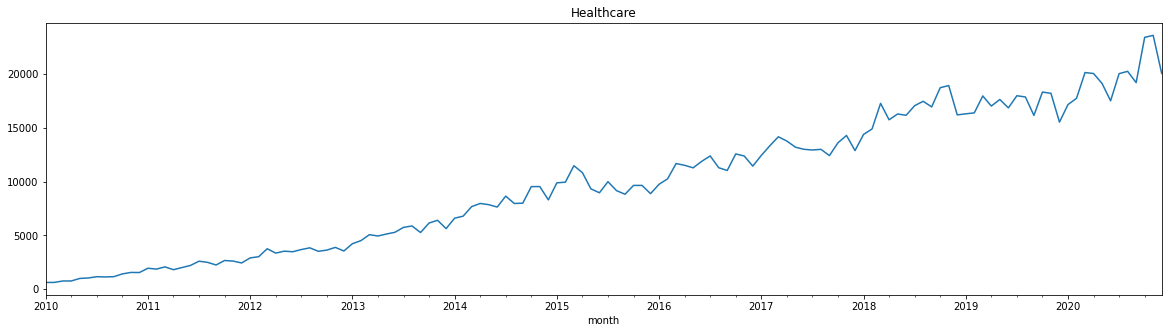

In [15]:
# Create a line plot of the "Healthcare" column
df_comp.Healthcare.plot(figsize=(20, 5), title="Healthcare")
plt.show()


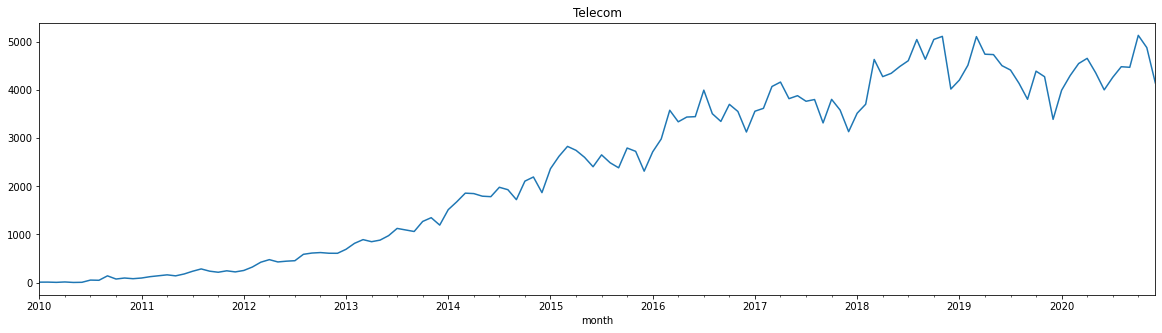

In [16]:
# Create a line plot of the "Telecom" column
df_comp.Telecom.plot(figsize=(20,5), title="Telecom")
plt.show()

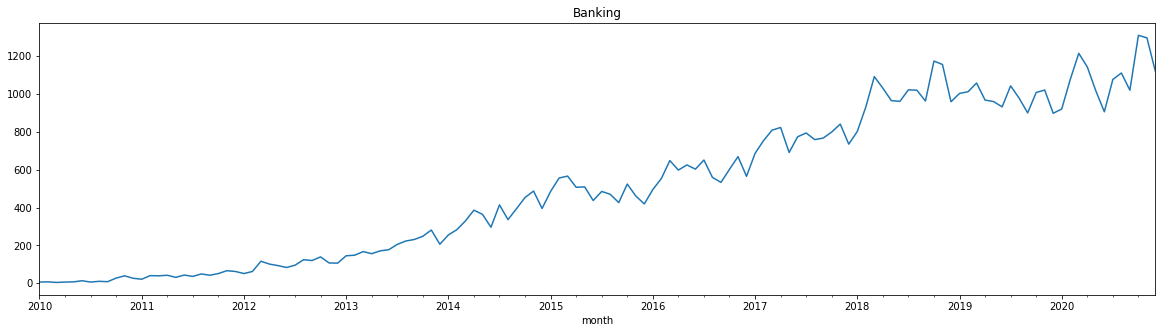

In [17]:
# Create a line plot of the "Banking" column
df_comp.Banking.plot(figsize=(20,5), title="Banking")
plt.show()

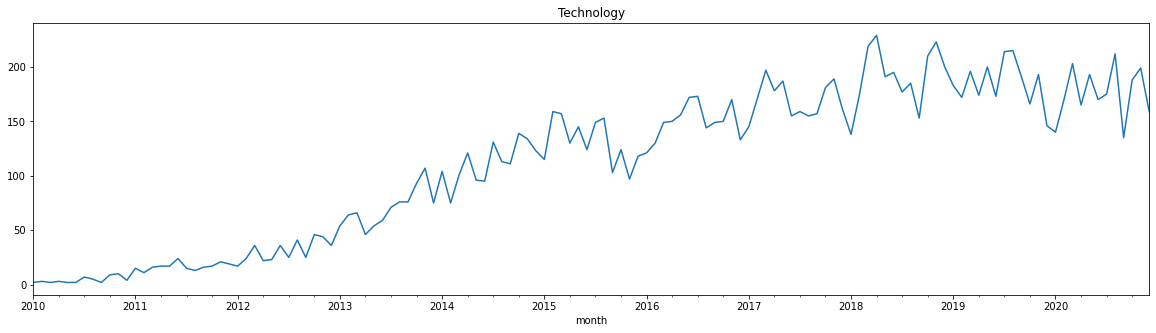

In [18]:
# Create a line plot of the "Technology" column
df_comp.Technology.plot(figsize=(20,5), title="Technology")
plt.show()

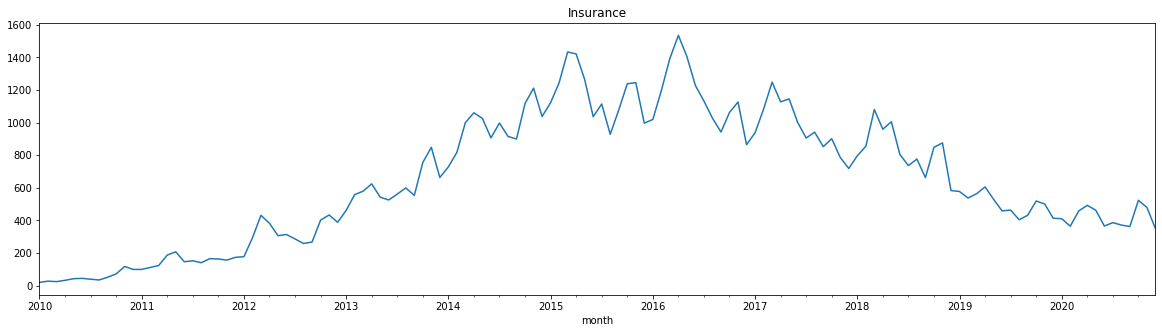

In [19]:
# Create a line plot of the "Insurance" column
df_comp.Insurance.plot(figsize=(20,5), title="Insurance")
plt.show()

---

## Check for normality

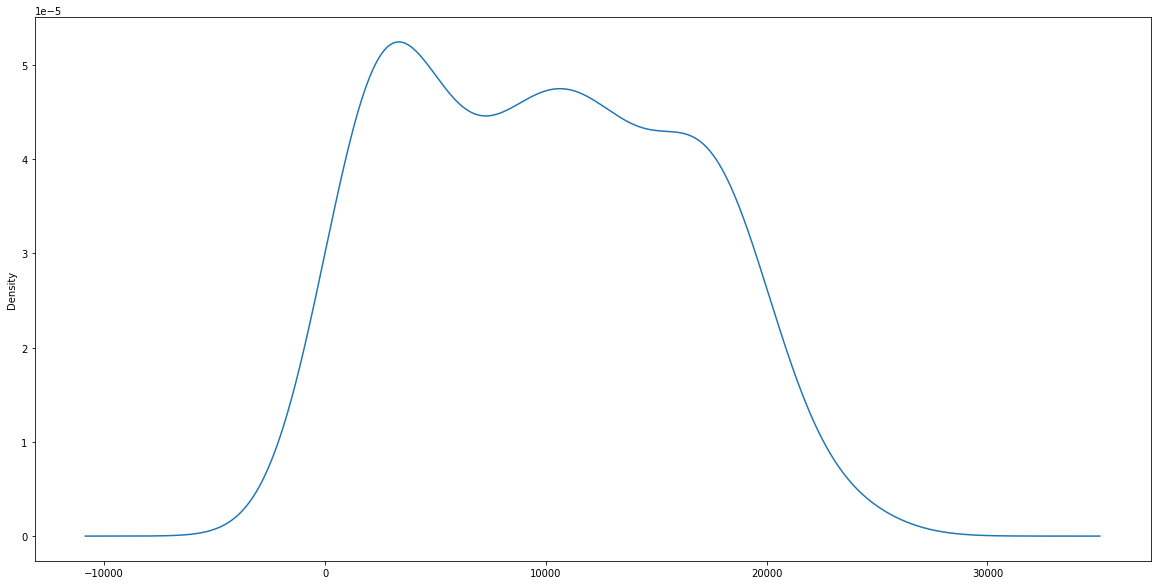

In [20]:
# Create a Kernel Density Estimation (KDE) plot for the "Healthcare" column
df_comp["Healthcare"].plot(kind='kde', figsize=(20, 10))
pyplot.show()

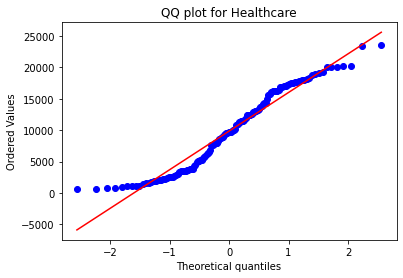

In [22]:
# Create a Quantile-Quantile (QQ) plot for the "Healthcare" column
scipy.stats.probplot(df_comp["Healthcare"], plot=pylab)
plt.title("QQ plot for Healthcare")
pylab.show()


---

## Gaussian Process

In [23]:
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, ConstantKernel
from sklearn.gaussian_process.kernels import RationalQuadratic

# Define a composite Gaussian process kernel by combining individual components

# Define individual kernel components
k0 = WhiteKernel(noise_level=0.3**2, noise_level_bounds=(0.1**2, 0.5**2))
k1 = ConstantKernel(constant_value=2) * ExpSineSquared(length_scale=1.0, periodicity=40, periodicity_bounds=(35, 45))
k2 = ConstantKernel(constant_value=100, constant_value_bounds=(1, 500)) * RationalQuadratic(length_scale=500, length_scale_bounds=(1, 1e4), alpha=50.0, alpha_bounds=(1, 1e3))
k3 = ConstantKernel(constant_value=1) * ExpSineSquared(length_scale=1.0, periodicity=12, periodicity_bounds=(10, 15))

# Combine the individual kernel components to create a composite kernel
kernel_4 = k0 + k1 + k2 + k3


In [24]:
# Create a Gaussian Process Regressor (GPR) model with custom parameters
from sklearn.gaussian_process import GaussianProcessRegressor

# Define the GPR model with the composite kernel, number of optimizer restarts, and other settings
gp2 = GaussianProcessRegressor(
    kernel=kernel_4,  # The composite kernel previously defined
    n_restarts_optimizer=10,  # Number of restarts for the optimizer
    normalize_y=True,  # Normalize the target values
    alpha=0.0  # Regularization parameter
)


In [25]:
# Create a new DataFrame 'data_df' containing columns 'timestamp' and 'Healthcare'
data_df = df_comp[["timestamp", "Healthcare"]]


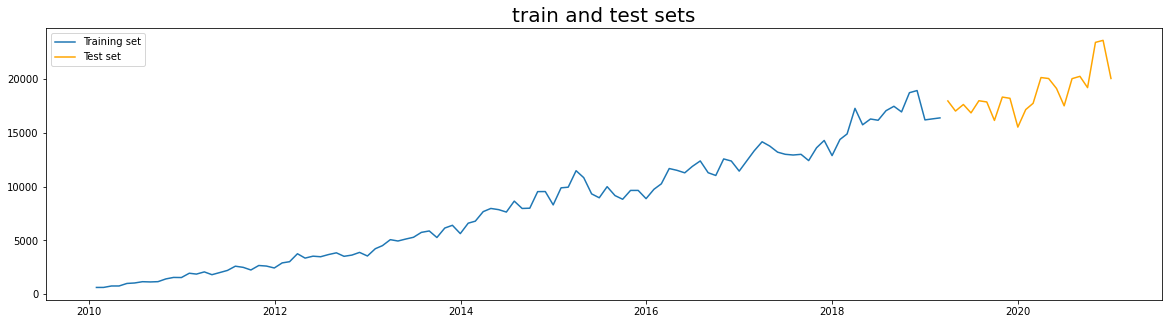

In [26]:
# Split the data into training and test sets
test_size = 22  # Number of data points for the test set

# Extract the 'timestamp' and 'Healthcare' columns
X = df_comp["timestamp"]
y = df_comp["Healthcare"]

# Create training and test data by slicing the data
x_train_t = X[:-test_size]
y_train_t = y[:-test_size]

x_test_t = X[-test_size:]
y_test_t = y[-test_size:]

# Create DataFrames 'df_train' and 'df_test' for the training and test sets
df_train = df_comp[:-test_size]
df_test = df_comp[-test_size:]

# Visualize the split data with a plot
plt.figure(figsize=(20, 5))
plt.title('Train and Test Sets', size=20)
plt.plot(y_train_t, label='Training set')
plt.plot(y_test_t, label='Test set', color='orange')
plt.legend()


In [27]:
# Reshape the training and test data arrays for compatibility with machine learning models

# Reshape the features (timestamps) for training and test data
x_train = x_train_t.values.reshape(-1, 1)
x_test = x_test_t.values.reshape(-1, 1)

# Reshape the target values (Healthcare) for training and test data
y_train = y_train_t.values.reshape(-1, 1)
y_test = y_test_t.values.reshape(-1, 1)


In [29]:
# Set Seaborn style and color palette

# Set the Seaborn style with 'darkgrid' and customize the appearance of axes and grid
sns.set_style(style='darkgrid', rc={'axes.facecolor': '.9', 'grid.color': '.8'})

# Set the Seaborn color palette to 'deep' and store it in 'sns_c' for later use
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')


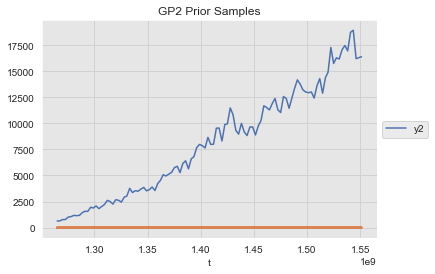

In [30]:
# Generate and visualize prior samples from a Gaussian Process Regressor (gp2)

# Generate prior samples (n_samples=100) from the Gaussian Process Regressor using x_train
gp2_prior_samples = gp2.sample_y(X=x_train, n_samples=100)

# Create a plot to visualize the prior samples
fig, ax = plt.subplots()

# Loop through the 100 prior samples and add them to the plot
for i in range(100):
    sns.lineplot(x=x_train[..., 0], y=gp2_prior_samples[:, i], color=sns_c[1], alpha=0.2, ax=ax)

# Add the actual training data to the plot
sns.lineplot(x=x_train[..., 0], y=y_train[..., 0], color=sns_c[0], label='y2', ax=ax)

# Add a legend and set the plot title and labels
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='GP2 Prior Samples', xlabel='t')


In [ ]:
gp2.fit(x_train, y_train)

In [ ]:
# Save and load a Gaussian Process Regressor model, and use it for predictions

import pickle

# Save the 'gp2' model to a pickle file named 'model.pkl'
pickle.dump(gp2, open("../Output/model.pkl", "wb"))

# Load a saved model from a pickle file named 'gaussian_model.pkl' (Note: File name inconsistency)
model = pickle.load(open("../Output/gaussian_model.pkl", "rb"))

# Add a 'timestamp' column to 'raw_csv_data' by converting 'month' to Unix timestamps
raw_csv_data["timestamp"] = raw_csv_data["month"].apply(lambda x: x.timestamp())

# Use the loaded 'model' to make predictions on the 'timestamp' data
predictions = model.predict(raw_csv_data["timestamp"].values.reshape(-1, 1))


In [ ]:
# Generate predictions and uncertainty estimates with the Gaussian Process Regressor

# Generate predictions and uncertainty estimates for the training data
y_pred, y_std = gp2.predict(x_train, return_std=True)

# Add the predictions, standard deviations, and prediction intervals to the 'df_train' DataFrame
df_train['y_pred'] = y_pred  # Predicted values
df_train['y_std'] = y_std  # Standard deviations
df_train['y_pred_lwr'] = df_train['y_pred'] - 2 * df_train['y_std']  # Lower prediction interval
df_train['y_pred_upr'] = df_train['y_pred'] + 2 * df_train['y_std']  # Upper prediction interval


In [ ]:
# Generate predictions and uncertainty estimates for the test data with the Gaussian Process Regressor

# Generate predictions and uncertainty estimates for the test data
y_pred_test, y_std_test = gp2.predict(x_test, return_std=True)

# Add the predictions, standard deviations, and prediction intervals to the 'df_test' DataFrame
df_test['y_pred'] = y_pred_test  # Predicted values for the test data
df_test['y_std'] = y_std_test  # Standard deviations for the test data
df_test['y_pred_lwr'] = df_test['y_pred'] - 2 * df_test['y_std']  # Lower prediction interval for the test data
df_test['y_pred_upr'] = df_test['y_pred'] + 2 * df_test['y_std']  # Upper prediction interval for the test data


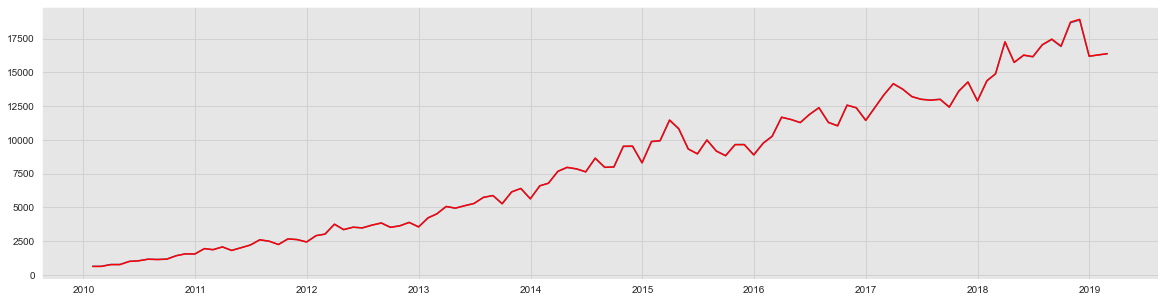

In [34]:
# Create a plot to visualize predicted values and actual values for the training data

# Set the plot size
plt.figure(figsize=(20, 5))

# Plot the predicted values in blue
plt.plot(df_train["y_pred"], label='Predicted', color='blue')

# Plot the actual values (Healthcare) in red
plt.plot(df_train["Healthcare"], label='Actual', color='red')

# Show the plot
plt.show()


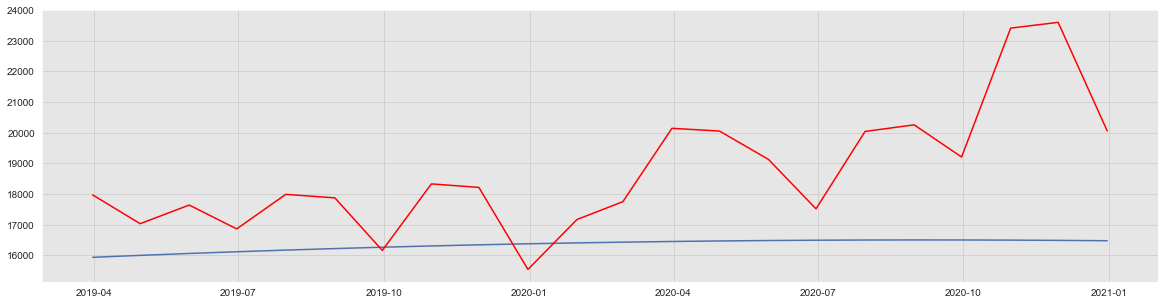

In [37]:
# Create a plot to visualize predicted values and actual values for the test data

# Set the plot size
plt.figure(figsize=(20, 5))

# Plot the predicted values in blue
plt.plot(df_test["y_pred"], label='Predicted', color='blue')

# Plot the actual values (Healthcare) in red
plt.plot(df_test["Healthcare"], label='Actual', color='red')

# Show the plot
plt.show()


In [39]:
# Print regression performance metrics

# Print the R-squared (R2) score for the training data
print(f'R2 Score Train = {gp2.score(X=x_train, y=y_train): 0.3f}')

# Print the R-squared (R2) score for the test data
print(f'R2 Score Test = {gp2.score(X=x_test, y=y_test): 0.3f}')

# Print the Mean Absolute Error (MAE) for the training data
print(f'MAE Train = {mean_absolute_error(y_true=y_train, y_pred=gp2.predict(x_train)): 0.3f}')

# Print the Mean Absolute Error (MAE) for the test data
print(f'MAE Test = {mean_absolute_error(y_true=y_test, y_pred=gp2.predict(x_test)): 0.3f}')


R2 Score Train =  1.000
R2 Score Test = -1.350
MAE Train =  10.377
MAE Test =  2471.742


In [ ]:
# Visualize regression performance on training data

# Calculate prediction errors
errors = gp2.predict(x_train) - y_train
errors = errors.flatten()
errors_mean = errors.mean()
errors_std = errors.std()

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create a scatter plot comparing y_train and predicted values
sns.regplot(x=y_train.flatten(), y=gp2.predict(x_train).flatten(), ax=ax[0])

# Create a histogram of prediction errors
sns.distplot(a=errors, ax=ax[1])

# Add vertical lines to indicate mean and mean ± 2 standard deviations
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--', label=f'$\mu$')
ax[1].axvline(x=errors_mean + 2 * errors_std, color=sns_c[4], linestyle='--', label=f'$\mu \pm 2\sigma$')
ax[1].axvline(x=errors_mean - 2 * errors_std, color=sns_c[4], linestyle='--')
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--')

# Add a legend to the histogram plot
ax[1].legend()

# Set titles and labels for the subplots
ax[0].set(title='Model 2 - Train vs Predictions (Train Set)', xlabel='y_train', ylabel='y_pred')
ax[1].set(title='Model 2 - Errors', xlabel='error', ylabel=None)


In [ ]:
# Visualize regression performance on test data

# Calculate prediction errors for the test data
errors = gp2.predict(x_test) - y_test
errors = errors.flatten()
errors_mean = errors.mean()
errors_std = errors.std()

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create a scatter plot comparing y_test and predicted values
sns.regplot(x=y_test.flatten(), y=gp2.predict(x_test).flatten(), ax=ax[0])

# Create a histogram of prediction errors
sns.distplot(a=errors, ax=ax[1])

# Add vertical lines to indicate mean and mean ± 2 standard deviations
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--', label=f'$\mu$')
ax[1].axvline(x=errors_mean + 2 * errors_std, color=sns_c[4], linestyle='--', label=f'$\mu \pm 2\sigma$')
ax[1].axvline(x=errors_mean - 2 * errors_std, color=sns_c[4], linestyle='--')
ax[1].axvline(x=errors_mean, color=sns_c[3], linestyle='--')

# Add a legend to the histogram plot
ax[1].legend()

# Set titles and labels for the subplots
ax[0].set(title='Model 2 - Test vs Predictions (Test Set)', xlabel='y_test', ylabel='y_pred')
ax[1].set(title='Model 2 - Errors', xlabel='error', ylabel=None)


---

## Difference (1)

In [47]:
# Calculate the first-order difference of the "Healthcare" column
df_comp["delta_1_Healthcare"] = df_comp.Healthcare.diff(1)


In [48]:
df_comp.head()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels,timestamp,delta_1_Banking,delta_1_Healthcare
month,,,,,,,,,,
2010-01-31,631,8,6,2,19,1,4,1.264896e+09,NaN,NaN
2010-02-28,633,9,7,3,27,1,3,1.267315e+09,1.0,2.0
2010-03-31,766,4,4,2,24,1,1,1.269994e+09,-3.0,133.0
2010-04-30,768,12,6,3,32,1,1,1.272586e+09,2.0,2.0
2010-05-31,1003,2,7,2,42,1,4,1.275264e+09,1.0,235.0


<AxesSubplot:xlabel='month'>

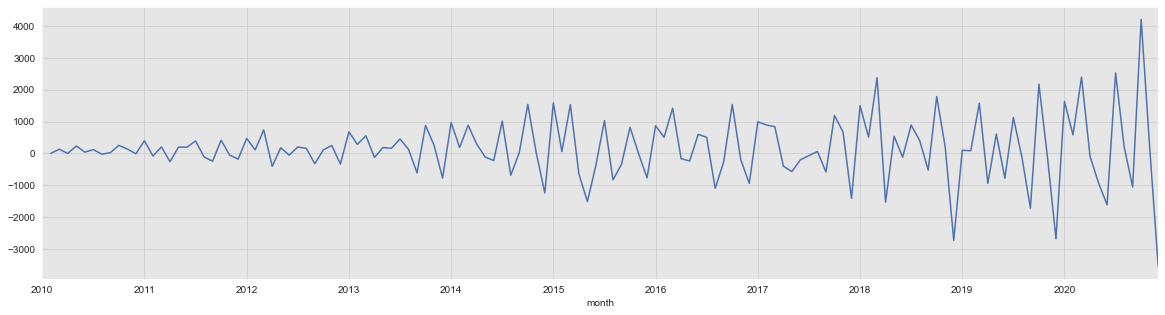

In [49]:
# Create a plot to visualize the "delta_1_Healthcare" values
df_comp.delta_1_Healthcare.plot(figsize=(20, 5))


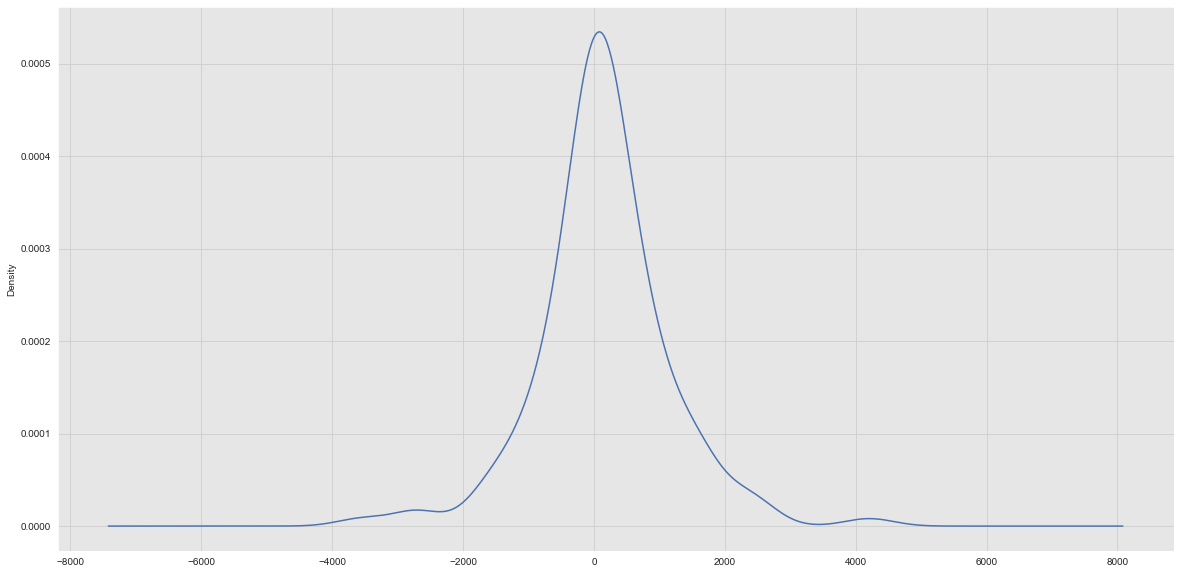

In [50]:
# Check the normality of "delta_1_Healthcare" with Density Plot

# Create a density plot for the "delta_1_Healthcare" values
df_comp["delta_1_Healthcare"].plot(kind='kde', figsize=(20, 10))
pyplot.show()


In [51]:
# Create a new DataFrame with "timestamp" and "delta_1_Healthcare" columns
data_df_res = df_comp[["timestamp", "delta_1_Healthcare"]]


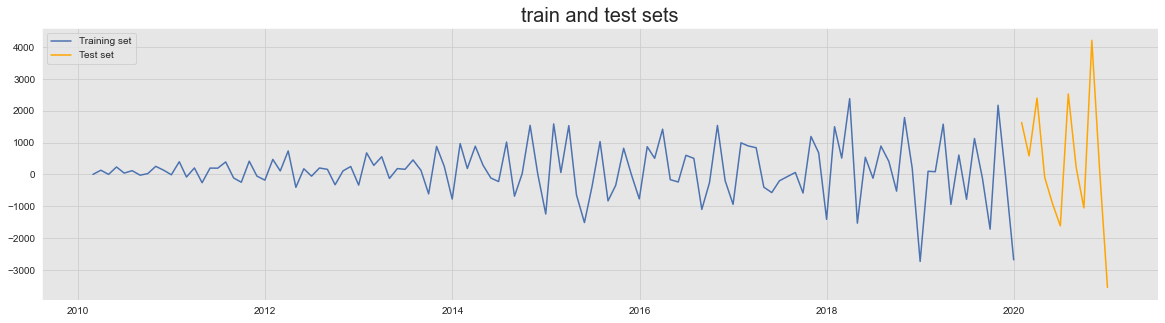

In [52]:
# Split the data into training and test sets

# Set the test size
test_size = 12

# Extract the "timestamp" and "delta_1_Healthcare" columns
X = df_comp["timestamp"]
y = df_comp["delta_1_Healthcare"]

# Divide the data into training and test sets
x_train_res = X[:-test_size]
y_train_res = y[:-test_size]
x_test_res = X[-test_size:]
y_test_res = y[-test_size:]

# Create DataFrames for training and test sets
df_train_res = data_df_res[:-test_size][1:]
df_test_res = data_df_res[-test_size:][1:]

# Create a plot to visualize the training and test sets
plt.figure(figsize=(20, 5))
plt.title('Train and Test Sets', size=20)
plt.plot(y_train_res, label='Training set')
plt.plot(y_test_res, label='Test set', color='orange')
plt.legend()


In [53]:
# Reshape the training and test data for time series analysis

# Reshape the training data for X and y, removing the first element
x_train_res_1 = x_train_res.values.reshape(-1, 1)[1:]
y_train_res_1 = y_train_res.values.reshape(-1, 1)[1:]

# Reshape the test data for X and y, removing the first element
x_test_res_1 = x_test_res.values.reshape(-1, 1)[1:]
y_test_res_1 = y_test_res.values.reshape(-1, 1)[1:]


In [54]:
# Define a Gaussian process kernel

# Create a White Kernel component with noise level
k0 = WhiteKernel(noise_level=0.3**2, noise_level_bounds=(0.1**2, 0.5**2))

# Create a combination of a Constant Kernel and ExpSineSquared Kernel
k1 = ConstantKernel(constant_value=2) * \
  ExpSineSquared(length_scale=1.0, periodicity=40, periodicity_bounds=(35, 45))

# Combine the White Kernel and the combined kernel
kernel_1 = k0 + k1


In [62]:
# Initialize a Gaussian Process Regressor (GP1)

# Use the defined kernel for modeling
gp1 = GaussianProcessRegressor(
    kernel=kernel_1,  # The chosen kernel for Gaussian process
    n_restarts_optimizer=5,  # Number of optimizer restarts
    normalize_y=True,  # Normalize the target values
    alpha=0.0001  # Regularization parameter
)


In [63]:
# Fit the Gaussian Process model (GP1) to the training data
gp1.fit(x_train_res_1, y_train_res_1)


GaussianProcessRegressor(alpha=0.0001,
                         kernel=WhiteKernel(noise_level=0.09) + 1.41**2 * ExpSineSquared(length_scale=1, periodicity=40),
                         n_restarts_optimizer=5, normalize_y=True)

In [64]:
# Generate predictions for the training data

# Generate predictions for the training data and calculate prediction statistics
y_pred, y_std = gp1.predict(x_train_res_1, return_std=True)

# Assign the predictions and prediction statistics to the DataFrame
df_train_res['y_pred'] = y_pred
df_train_res['y_std'] = y_std
df_train_res['y_pred_lwr'] = df_train_res['y_pred'] - 2*df_train_res['y_std']
df_train_res['y_pred_upr'] = df_train_res['y_pred'] + 2*df_train_res['y_std']


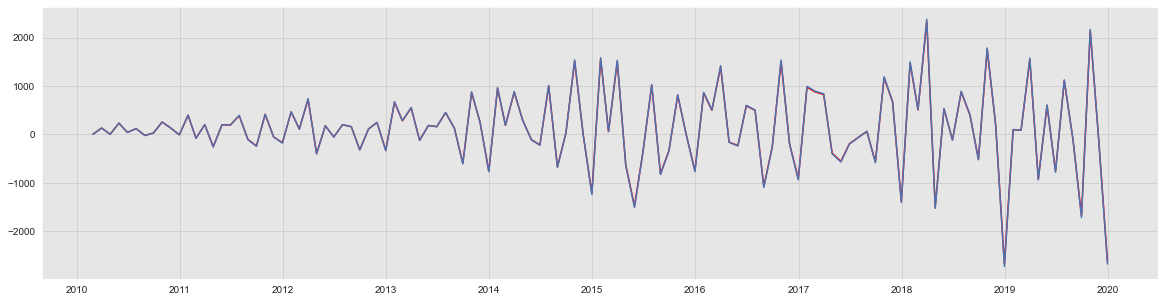

In [65]:
# Create a plot to visualize predicted values and actual difference values for the training data

# Set the plot size
plt.figure(figsize=(20, 5))

# Plot the predicted values (in red)
plt.plot(df_train_res["y_pred"], color='red', label='Predicted')

# Plot the actual difference values (in blue)
plt.plot(df_train_res["delta_1_Healthcare"], label='Actual', color='blue')

# Show the plot
plt.show()


In [66]:
# Generate predictions for the testing data

# Generate predictions for the testing data and calculate prediction statistics
y_pred, y_std = gp1.predict(x_test_res_1, return_std=True)

# Assign the predictions and prediction statistics to the DataFrame
df_test_res['y_pred'] = y_pred
df_test_res['y_std'] = y_std
df_test_res['y_pred_lwr'] = df_test_res['y_pred'] - 2*df_test_res['y_std']
df_test_res['y_pred_upr'] = df_test_res['y_pred'] + 2*df_test_res['y_std']


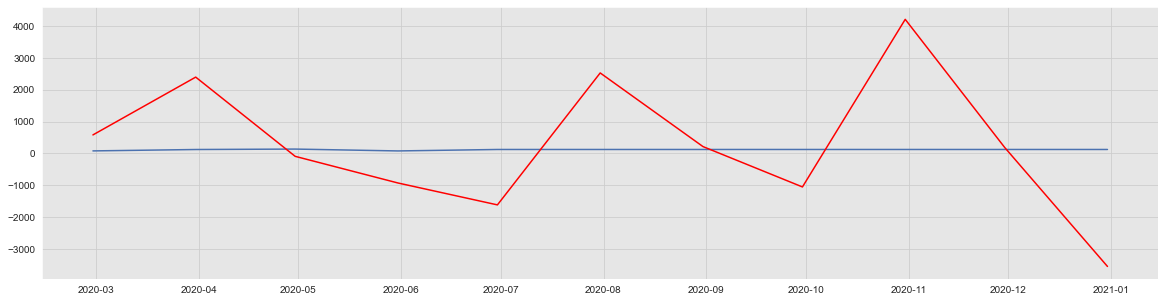

In [67]:
# Create a plot to visualize predicted values and actual difference values for the testing data

# Set the plot size
plt.figure(figsize=(20, 5))

# Plot the predicted values (in blue)
plt.plot(df_test_res["y_pred"], label='Predicted', color='blue')

# Plot the actual difference values (in red)
plt.plot(df_test_res["delta_1_Healthcare"], label='Actual', color='red')

# Show the plot
plt.show()


In [68]:
df_test_res

,timestamp,delta_1_Healthcare,y_pred,y_std,y_pred_lwr,y_pred_upr
month,,,,,,
2020-02-29,1.582934e+09,582.0,80.606201,817.026434,-1553.446667,1714.659069
2020-03-31,1.585613e+09,2395.0,124.039151,817.026434,-1510.013716,1758.092019
2020-04-30,1.588205e+09,-90.0,137.686661,817.026434,-1496.366207,1771.739529
2020-05-31,1.590883e+09,-926.0,79.510415,817.026434,-1554.542452,1713.563283
2020-06-30,1.593475e+09,-1613.0,125.260504,821.111157,-1516.961810,1767.482819
2020-07-31,1.596154e+09,2526.0,125.260504,821.111157,-1516.961810,1767.482819
2020-08-31,1.598832e+09,216.0,125.260504,821.111157,-1516.961810,1767.482819
2020-09-30,1.601424e+09,-1050.0,125.260504,821.111157,-1516.961810,1767.482819
2020-10-31,1.604102e+09,4207.0,125.260504,821.111157,-1516.961810,1767.482819


---